# Installing/Importing libraries

If not installed yet, run the following cell:

In [123]:
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install mlxtend
# !pip install statsmodels

In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing, preprocessing and analyzing data

## Importing dataset and checking for missing data

Data from "https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression" is initially imported.

In [125]:
ds = pd.read_csv("real_estate_dataset.csv") #ds stands for dataset
ds.head(3)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.63502971,1,3,3,1967,1,1,48,8.29763120,5.93573364,602134.81674659
1,2,287.67857660,1,2,1,1949,0,1,37,6.06146565,10.82739220,591425.13538622
2,3,232.99848545,1,3,2,1923,1,0,14,2.91144248,6.90459907,464478.69687988


Column names will be changed so the data set is easily displayed.

In [126]:
#Renaming the dataset columns
ds.columns = ['ID', 'SqFeet', 'NBedrms', 'NBathrms', 'N_Flrs',
       'YrBuilt', 'Garden', 'Pool', 'GrgeSz', 'LocScr',
       'DistToCntr', 'Price']
#Displaying the first 3 elements of the dataset
ds.head(3)

,ID,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
0,1,143.63502971,1,3,3,1967,1,1,48,8.29763120,5.93573364,602134.81674659
1,2,287.67857660,1,2,1,1949,0,1,37,6.06146565,10.82739220,591425.13538622
2,3,232.99848545,1,3,2,1923,1,0,14,2.91144248,6.90459907,464478.69687988


### Checking for missing data

Lets see if there is any missing data.

In [127]:
ds.isnull().any().to_numpy().any()

False

So it seems there is no missing data in the dataset.

## Anlyzing the kind of data

## Inspecting the kind of data

Lets take a sample and see the kind of data to study:

In [128]:
#Take a random sample from the dataset
ds.sample()

,ID,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
307,308,130.73911824,5,2,2,1961,0,0,48,7.84861823,3.32043647,688627.59815482


So the data set is composed of the following kind of data:
- ID $\rightarrow$ house identifier. It does not have an impact on predictions, then will be removed in the next step.

---

#### **Features**
**Numerical**
- SqFeet $\rightarrow$ size of the house in square feet.
- NBedrms $\rightarrow$ number of bedrooms of the house. 
- NBathrms $\rightarrow$ number of bathrooms of the house.
- N_Flrs $\rightarrow$ number of floors of the house.
- YrBuilt $\rightarrow$ year when the house was built.
- GrgeSz $\rightarrow$ garage size in square feet.
- LocScr $\rightarrow$ house location score from 0 to 10 (may depend on things weather, criminality, etc). 
- DistToCntr $\rightarrow$ distance from the house to the center of the city (in km).

**Categorical**
- Garden $\rightarrow$ if the house does or not have a garden ("Yes"=1).
- Pool $\rightarrow$ if the house does or not have a pool ("Yes"=1).

---

#### **Target**
**Numerical**
- Price $\rightarrow$ total price of the house.

---

As said above, ID has no impact on predictions, then it's removed:

In [129]:
if "ID" in ds.columns:
    ds = ds.drop(columns=["ID"])
ds.sample()

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
12,258.1106602,3,2,3,1973,1,0,11,5.8220876,3.33862142,685123.5340515


As said above, the dataset has two categorical features: Garden and Pool. 

Nevertheless this have just been encoded into a 0/1 numerical variable, where 1 stands for  "yes" and 0 for "no". So no categorical variable preprocessing (as applying a LabelEncoder) is needed.

## Statistical analysis of the data

### Means, std deviations and extrema

In [130]:
ds.describe().iloc[[1,2,3,7],:]

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
mean,174.64042806,2.958000,1.9760000,1.96400000,1957.60400000,0.53600000,0.49200000,30.17400000,5.16440998,10.46964127,582209.62952856
std,74.67210210,1.440968,0.8202253,0.80249111,35.49178098,0.49920177,0.50043668,11.58257467,2.85348863,5.58819663,122273.39034509
min,51.26539596,1.000000,1.0000000,1.00000000,1900.00000000,0.00000000,0.00000000,10.00000000,0.00442781,0.06281812,276892.47013589
max,298.24119903,5.000000,3.0000000,3.00000000,2022.00000000,1.00000000,1.00000000,49.00000000,9.99543919,19.92796587,960678.27429119


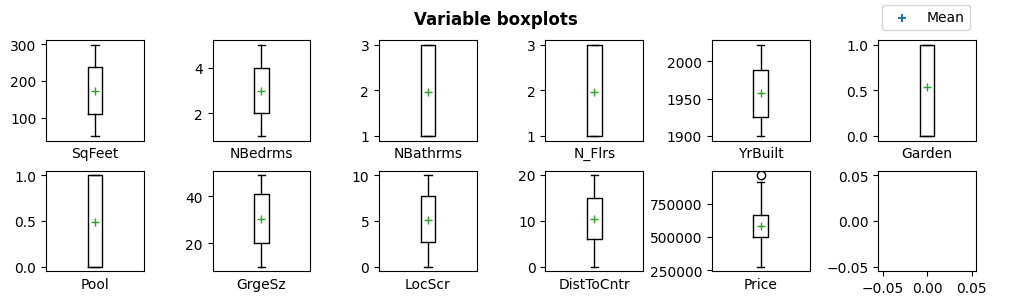

In [131]:
cols = ds.columns 
ncols_ = len(cols)
axrows = 2
axcols = 6
plt.close()
fig, ax = plt.subplots(ncols=axcols, nrows=axrows, figsize=(12,3))
col_i=0
for ax_i,ax_j in [[i,j] for i in range(axrows) for j in range(axcols)]:
    if col_i<ncols_:
        col_name = cols[col_i]
        ax[ax_i,ax_j].boxplot(ds[col_name], whis=None, medianprops={"linewidth":0}, showmeans=True, meanprops={"marker":"+"})
        ax[ax_i,ax_j].set_xticks([])
        ax[ax_i,ax_j].set_xlabel(col_name)
        col_i+=1

fig.suptitle("Variable boxplots", weight="bold")
fig.subplots_adjust(wspace=0.7,hspace=0.3)
plt.scatter([],[], marker="+", label="Mean")
fig.legend(loc=(0.86,0.9))
plt.show()

### Analyzing correlations

Text(0.5, 1.0, 'Correlation heatmap')

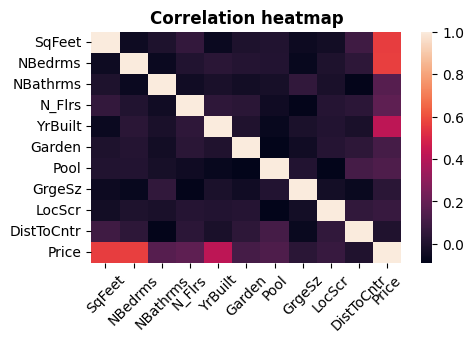

In [132]:
plt.close()
plt.figure(figsize=(5,3))
sns.heatmap(ds.corr())
plt.tick_params(axis="x", rotation=45)
plt.title("Correlation heatmap", weight="bold")

From the heatmap plotted above we see that:
- There doesn't seem to be a strong correlation between the features.
- Features with a higher correlation to the response ("price") are, in descending order NBedrms, SqFeet and YrBuilt (with a correlation higher than 0.4). So, a priori, this are the strongest "price" predictors.       

---
To inspect the correlations numerically, in descending order with respect to the correlation to "Price":

In [133]:
ds.corr().sort_values(by="Price", ascending=False)

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
Price,0.55860367,0.56397288,0.15668876,0.17743503,0.41829259,0.10919609,0.13657924,0.03210037,0.07132625,0.00073046,1.00000000
NBedrms,-0.04991779,1.00000000,-0.05680788,0.00908798,0.03180565,0.01742873,0.01203883,-0.06548052,-0.00035697,0.04051061,0.56397288
SqFeet,1.00000000,-0.04991779,-0.00166706,0.05687328,-0.05506244,-0.00097790,0.00752993,-0.05159804,-0.03526962,0.09308023,0.55860367
YrBuilt,-0.05506244,0.03180565,-0.01340665,0.04692172,1.00000000,0.00069313,-0.06505566,-0.00810477,0.00961402,-0.01511270,0.41829259
N_Flrs,0.05687328,0.00908798,-0.04089467,1.00000000,0.04692172,0.03325631,-0.04562956,-0.08276296,0.01992767,0.03516434,0.17743503
NBathrms,-0.00166706,-0.05680788,1.00000000,-0.04089467,-0.01340665,-0.03704003,-0.02487978,0.05570701,-0.01385543,-0.08257064,0.15668876
Pool,0.00752993,0.01203883,-0.02487978,-0.04562956,-0.06505566,-0.08708514,1.00000000,0.01147707,-0.08872208,0.11038240,0.13657924
Garden,-0.00097790,0.01742873,-0.03704003,0.03325631,0.00069313,1.00000000,-0.08708514,-0.03799755,0.01912978,0.04030520,0.10919609
LocScr,-0.03526962,-0.00035697,-0.01385543,0.01992767,0.00961402,0.01912978,-0.08872208,-0.02993876,1.00000000,0.05444570,0.07132625
GrgeSz,-0.05159804,-0.06548052,0.05570701,-0.08276296,-0.00810477,-0.03799755,0.01147707,1.00000000,-0.02993876,-0.06140651,0.03210037


### Categorical variable inspection

To ease the analysis, lets create a new dataframe for this subsection with the categorical features decoded:

In [134]:
ds_ = ds.copy(deep=False)
col_nms = ["Garden", "Pool"]
for key in col_nms:
    ds_[key] = [("Yes" if val==1 else "No") for val in ds_[key]] 
n_ = np.random.randint(0,len(ds))
ds.iloc[[n_],:]

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
89,168.05373129,4,1,3,1931,1,0,16,3.09999937,7.38963868,546491.12318644


In [135]:
ds_.iloc[[n_],:]

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
89,168.05373129,4,1,3,1931,Yes,No,16,3.09999937,7.38963868,546491.12318644


---

Now the auxiliar dataset is correctly encoded lets analyze categorical features:

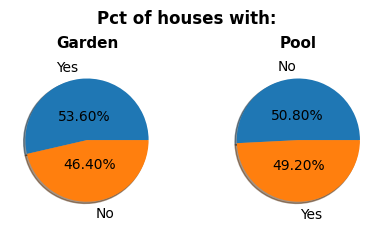

In [136]:
plt.close()
col_nms = ["Garden", "Pool"] #Categorical features to analyze
ncols_ =2 
fig, ax = plt.subplots(ncols=ncols_, figsize=(5,2))
for ax_i in range(ncols_):
    col_name = col_nms[ax_i]
    vals = ds_[col_name].value_counts()
    ax[ax_i].pie(vals.values,
                 labels=vals.index,
                 labeldistance=1.2,
                 autopct="%.2f%%",
                 pctdistance=0.4,
                 shadow=True)
    ax[ax_i].set_title(col_name, weight="bold", fontsize=11, y=1.05)

fig.suptitle("Pct of houses with:", weight="bold", y=1.15)
plt.show()

So the set of observations is diversed in this two categorical variables, as both classes are almost equally represented in each feature (i.e. there is approximatelly the same number of "yes" and "no" in both categories). 

---

Lets also see the histogram of prices for each feature class:

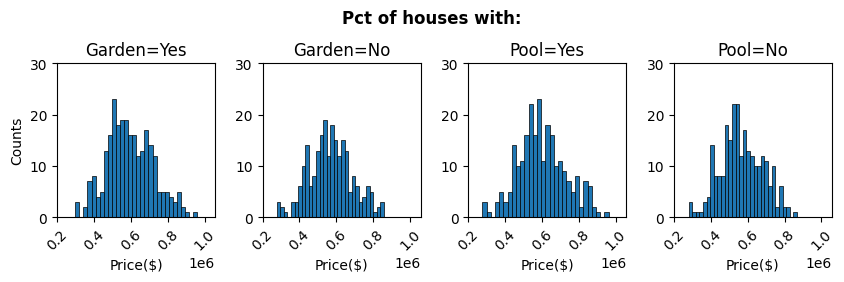

In [137]:
plt.close()
col_nms = ["Garden", "Pool"]
ncols_ = 4 
fig, ax = plt.subplots(ncols=ncols_, figsize=(10,2))
ax_i = 0
for name in col_nms:
    for n in ["Yes", "No"]:
        price = ds_[ds_[name]==n]["Price"]
        ax[ax_i].hist(price,
                      edgecolor="black",
                      linewidth=0.5,
                      bins=30)
        ax[ax_i].tick_params(axis="x", rotation=45)
        ax[ax_i].set_title(f"{name}={n}")
        ax[ax_i].set_xlim(0.9*min(ds_["Price"]), 1.1*max(ds_["Price"]))
        ax[ax_i].set_ylim(0,30)
        ax[ax_i].set_xlabel("Price($)")
        ax[ax_i].set_xticks([i*1e6 for i in np.linspace(0.2,1,5)])
        ax_i+=1
ax[0].set_ylabel("Counts")
fig.suptitle("Pct of houses with:", weight="bold", y=1.15)
fig.subplots_adjust(wspace=0.3)
plt.show()

ThenSo from the plot above we see that: 
- Houses with/without garden/pool follow a distribution with a mean from which the probability density mostly diminishes as we get far (from that mean), as with a gaussian distribution.
- Those houses with garden or pool can at most cost more than those without any of them, but not at less (what is infered looking at the tails of the distributions).
---

#### Is there any correlation between having a garden and a pool?

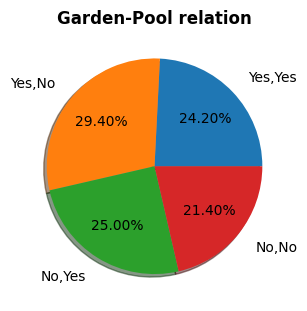

In [138]:
yn = ["Yes", "No"]
responses = [[i,j] for i in yn for j in yn]
subsets = [ds_[(ds_["Garden"]==i)&(ds_["Pool"]==j)] for i,j in responses]

plt.close()
plt.figure(figsize=(4,3.5))
labels_ = [f"{i},{j}" for i,j in responses]
plt.pie([len(x) for x in subsets],
        labels=labels_,
        labeldistance=1.2,
        autopct="%.2f%%",
        pctdistance=0.65,
        shadow=True)
plt.title("Garden-Pool relation", weight="bold")
plt.show()

As each of the four categories has almost the same percentage, it seems that those houses with a garden do not strictily seem to have also a pool(and the other way around).

### Numerical variable inspection

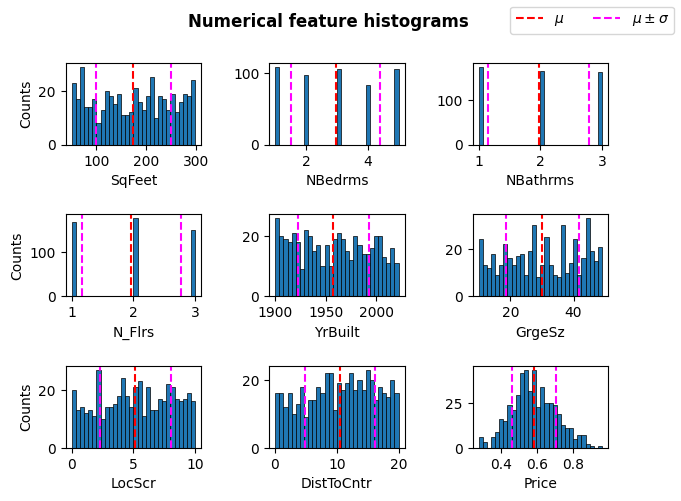

In [139]:
num_cols = ['SqFeet', 'NBedrms', 'NBathrms', 'N_Flrs', 'YrBuilt', 'GrgeSz', 'LocScr', 'DistToCntr', 'Price'] #Names for the numerical features
ncols_ = 3
nrows_ = 3
plt.close()
fig,ax = plt.subplots(ncols=ncols_, nrows=nrows_, figsize=(7,5))
col_index = 0
for ax_i,ax_j in [[i,j] for i in range(nrows_) for j in range(ncols_)]:
    col_name = num_cols[col_index]
    ax[ax_i, ax_j].hist(ds[col_name],
                        edgecolor="black",
                        linewidth=0.5,
                        bins=30)
    ax[ax_i, ax_j].set_xlabel(col_name)
    ax[ax_i, ax_j].axvline(x=ds[col_name].mean(),
                           color="red",
                           linestyle="--",
                           lw=1.5)
    ax[ax_i, ax_j].axvline(x=ds[col_name].mean()+ds[col_name].std(),
                           color="magenta",
                           linestyle="--",
                           lw=1.5)
    ax[ax_i, ax_j].axvline(x=ds[col_name].mean()-ds[col_name].std(),
                           color="magenta",
                           linestyle="--",
                           lw=1.5)
    if ax_j==0:
        ax[ax_i, ax_j].set_ylabel("Counts")
    if col_name=="Price":
        ax[ax_i, ax_j].set_xticks([i*1e6 for i in np.linspace(0.2, 1.0, 5)])
        ax[ax_i, ax_j].set_xticklabels([f"{i:.1f}" for i in np.linspace(0.2, 1.0, 5)])
    col_index+=1
fig.suptitle("Numerical feature histograms", weight="bold")
fig.subplots_adjust(hspace=.85, wspace=0.5)
plt.plot([],[],ls="--",color="red", label="$\mu$")
plt.plot([],[],ls="--", color="magenta",label="$\mu\pm\sigma$")
fig.legend(ncols=2)
plt.show()

Again, more or less, the sample seems to be very diverse in its predictors, as the histograms do not seem to concentrate in any region.

**Nevertheless** price as a distribution clearly different from those of the predictors, as price's histogram shows a mean price from which the number of houses tend to decrease as the price decreases or increases (from that mean).  

### Scatterplots and emerging trends

Lets see now the scatterplots to look for any possible trend between variables:

Text(0.5, 1.0, 'Matrix scatter plot')

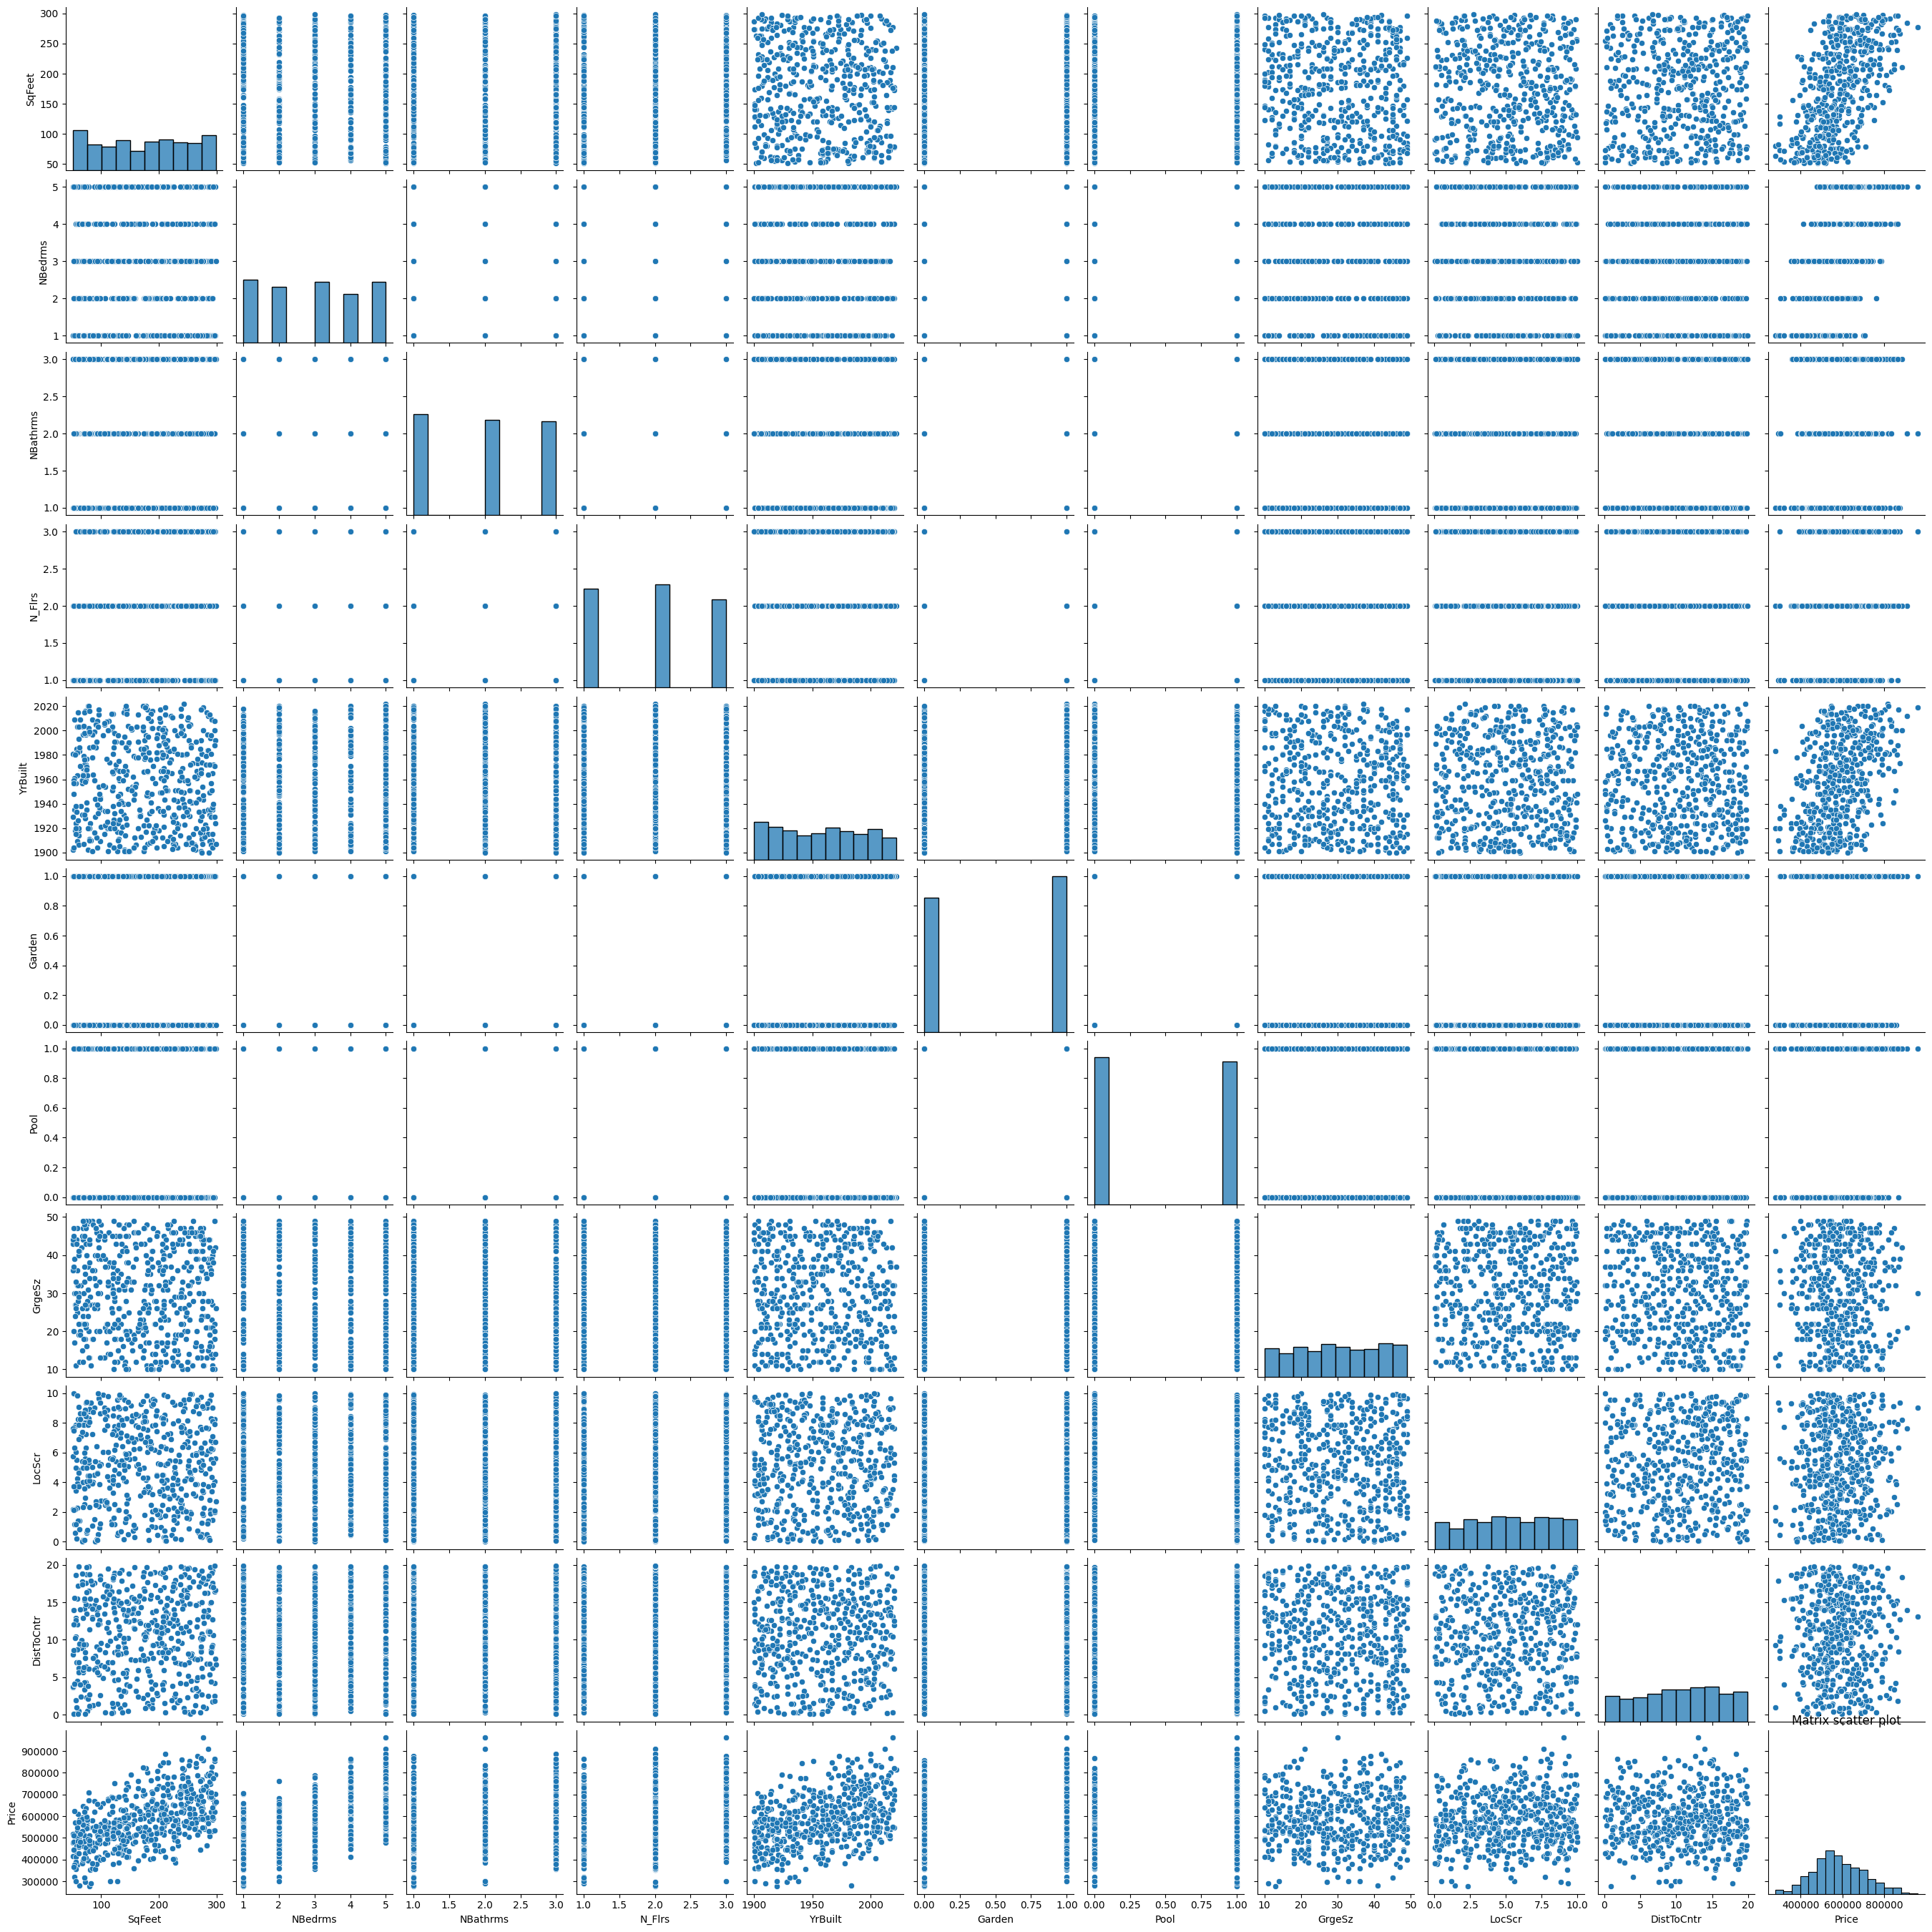

In [140]:
sns.pairplot(ds)
plt.title("Matrix scatter plot")

The scatter plots between features show that there does not seem to be correlation between features, as, a priori, there is no trend between any pair of features. 

However, some of the scatterplots between a feature and the response ("Price") seem to follow a trend. Lets inspect them more closely:

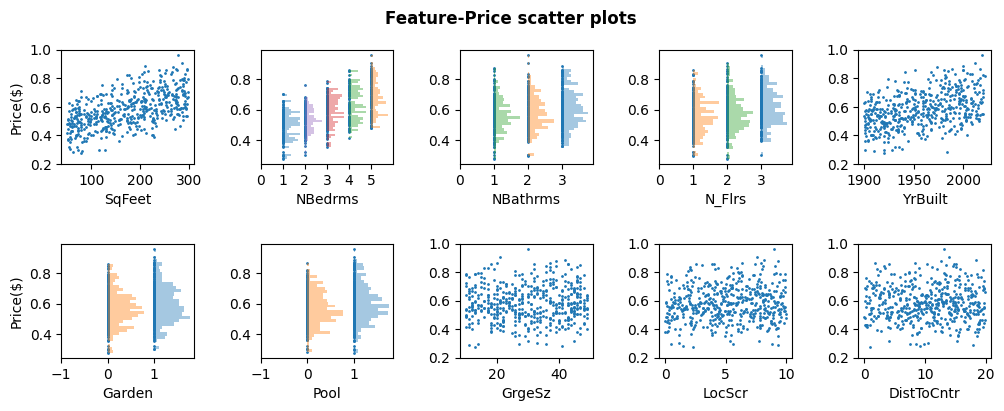

In [141]:
X = ds.iloc[:,:-1].values   #500x10 numpy array containing the features
y = ds.iloc[:,-1].values    #500x1 numpy array containing the responses
n_feat = len(X[0])
feat_names = ds.columns[:n_feat]

ncols_ = 5
nrows_ = 2

plt.close()
fig,ax = plt.subplots(ncols=ncols_, nrows=nrows_, figsize=(12,4))
feat_i = 0
for ax_i, ax_j in [[i,j] for i in range(nrows_) for j in range(ncols_)]:
    ax[ax_i,ax_j].scatter(X[:,feat_i],
                       y,
                       s=1)
    if ax_j==0:
        ax[ax_i,ax_j].set_ylabel("Price($)")
    ax[ax_i,ax_j].set_yticks([i*1e6 for i in np.linspace(0.2,1,5)])
    ax[ax_i,ax_j].set_yticklabels([f"{i:0.1f}" for i in np.linspace(0.2,1,5)])
    feat_name = feat_names[feat_i]
    ax[ax_i,ax_j].set_xlabel(feat_name)

    if feat_name in ["NBedrms","NBathrms", "N_Flrs","Garden", "Pool"]:
        unique_vals = ds[feat_name].unique()
        for val in unique_vals:
            sub_price = ds[ds[feat_name]==val]["Price"]
            nbins_ = 30
            weights_ = np.ones_like(sub_price)/(1.3*max(np.histogram(sub_price, bins=nbins_)[0]))
            ax[ax_i,ax_j].hist(sub_price, 
                               orientation="horizontal",
                               bins=30,
                               weights=weights_,
                               bottom=val,
                               alpha=0.4)
        ax[ax_i,ax_j].set_xticks(np.arange(min(unique_vals)-1, max(unique_vals)+1))

    feat_i+=1

fig.suptitle("Feature-Price scatter plots", weight="bold")
fig.subplots_adjust(wspace=0.5, hspace=.7)
plt.show()

From the plot located above we may initially infer that:
- SqFeet, YrBuilt, Nbedrms and NBathrms seem to be related to the price of the house, as the bigger this values, the higher the price of the house. As the relation seems to be linear at first, we'll assume that's the case, until plotting the residuals plot, where we can prove it.

- As said before, those houses with a garden or a pool can at most cost more than those whithout any of both.

- GarageSize, LocationScore and DistanceToCenter do not apparently exhibit a strong relation with the price of the house, as their scatterplots are very diverse for any price band.

# Model training

First lets divide the set of 500 observations into a train and a test set. 

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Now we'll train three different linear regressions applying various techniques to see:
- Which performs better in the test set.
- Which features best predict house price. 

## Forward selection

In this section a linear regression will be made using forward selection, so only preidctors that improve the scoring are chosen.

### Model Training

First the adjusted r2  metric is defined for the step-wise selection process scoring.

In [143]:
def adjusted_r2(estimator, X, y):
    y_pred = estimator.predict(X)
    RSS = np.sum((y-y_pred)**2)
    TSS = np.sum((np.mean(y)-y)**2)
    r2 = 1-RSS/TSS
    n=len(X)
    p=len(X[0])
    return 1-(1-r2)*(n-1)/(n-p-1)

Then forward selection in computed:

In [144]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs = SequentialFeatureSelector(estimator=lr,
                                k_features=(1,len(X[0])),
                                forward=True,
                                scoring=adjusted_r2,
                                cv=5)
sfs.fit(X_train, y_train)
print()

After the model is trained, lets inspect its results.

In [145]:
keys = ['feature_idx', 'avg_score']
v=[]
subsets = list(sfs.subsets_.values())
for i in range(len(subsets)):
    v.append([subsets[i][key] for key in keys])
ss_df = pd.DataFrame(columns=keys, data=v)  #ss_df stands for subset dataframe
ss_df["feature_idx"] = [list(x) for x in ss_df["feature_idx"]]
ss_df["feature_idx"] = [[feat_names[i] for i in x]  for x in ss_df["feature_idx"]]
pd.set_option("display.max_colwidth", None)
ss_df.style.set_properties(**{'text-align': 'center'})
pd.set_option("display.precision", 5)
ss_df.sort_values(by="avg_score")

,feature_idx,avg_score
0,[SqFeet],0.30740
1,"[SqFeet, NBedrms]",0.62957
2,"[SqFeet, NBedrms, YrBuilt]",0.82924
3,"[SqFeet, NBedrms, NBathrms, YrBuilt]",0.86706
4,"[SqFeet, NBedrms, NBathrms, YrBuilt, Pool]",0.89625
5,"[SqFeet, NBedrms, NBathrms, YrBuilt, Garden, Pool]",0.91457
6,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool]",0.93045
7,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz]",0.94498
8,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz, LocScr]",0.95757
9,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz, LocScr, DistToCntr]",0.96737


So forward selection suggest that every feature should be considered, with best price predictors in descending order as:

SqFeet $\rightarrow$ NBedrms $\rightarrow$ YrBuilt $\rightarrow$ NBathrms $\rightarrow$ Pool $\rightarrow$ Garden $\rightarrow$ N_Flrs $\rightarrow$ GrgeSz $\rightarrow$ LocScr $\rightarrow$ DistToCntr

---

It may be also interesting to see how much the model improves its results as each new feature is added. It can be done in the following figure:

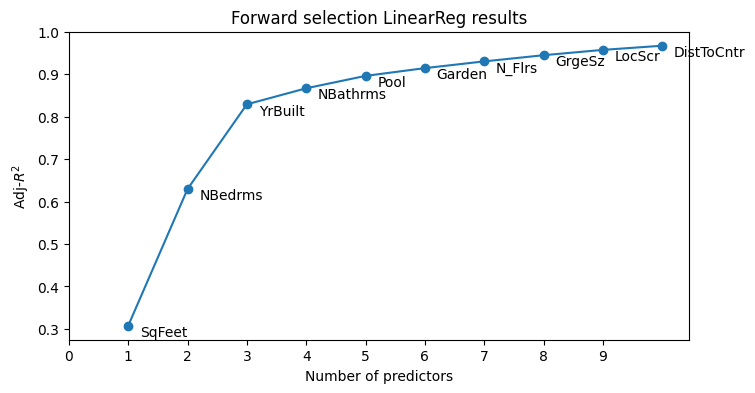

In [146]:
plt.close()
plt.figure(figsize=(8,4))
x_grid = np.arange(len(ss_df))
plt.plot(x_grid+1, ss_df["avg_score"], marker="o")
named = []
for x in x_grid:
    new_feat = [str(x) for x in ss_df["feature_idx"][x] if x not in named][0]
    plt.annotate(text=new_feat,
                 xy=(x+1.2,ss_df["avg_score"][x]-0.025))
    named.append(new_feat)
plt.xticks(x_grid)
plt.xlabel("Number of predictors")
plt.ylabel("Adj-$R^2$")
plt.title("Forward selection LinearReg results")
plt.show()

The plot above suggests that the predictors with a higher impact in the house price are SqFeet, NBedrms and YrBuilt, as this three result in an adj-$R^2\approx 0.83$ value from where it slowly increases as new features are included.

---

Lets also inspect the p-values associated to each feature:

In [147]:
import statsmodels.api as sm
Xtrain_ = sm.add_constant(X_train[:,sfs.k_feature_idx_])    #Only features chosen by foward selection are considered.
modelo = sm.OLS(y_train, Xtrain_).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1496.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.08e-303
Time:                        10:14:49   Log-Likelihood:                -4509.1
No. Observations:                 400   AIC:                             9040.
Df Residuals:                     389   BIC:                             9084.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.882e+06   5.46e+04    -52.826      0.000   -2.99e+06   -2.77e+06
x1          1021.2719     13.001     78.551      0.000     995.710    1046.834
x2          5.079e+04    689.476     73.669      0.000    4.94e+04    5.21e+04
x3          2.946e+04   1179.452     24.980      0.000    2.71e+04    3.18e+04
x4          2.082e+04   1219.883     17.068      0.000    1.84e+04    2.32e+04
x5          1510.4649     27.672     54.584      0.000    1456.059    1564.870
x6          3.196e+04   1951.934     16.373      0.000    2.81e+04    3.58e+04
x7          4.778e+04   1954.511     24.446      0.000    4.39e+04    5.16e+04
x8          1155.6231     84.264     13.714      0.000     989.952    1321.294
x9          4701.9225    338.063     13.908      0.000    4037.264    5366.581
x10        -1980.7369    172.299    -11.496      0.000   -2319.491   -1641.983
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.811
Skew:                          -0.102   Prob(JB):                        0.667
Kurtosis:                       2.914   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As every p-value is extremely low, every feature have an impact on the price of the house (however it does not mean the impact is direct, although I think it is the case, considering the kind of features).

---

Now that we know the best multiple linear regression is likely to be that with all the predictors, the remaining steps are fitting a linear model with all the predictors and then test it.

Lets first train the model:

In [148]:
lr = LinearRegression()
lr.fit(X_train[:,sfs.k_feature_idx_], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Before testing the model, lets inspect the regression coefficients:

In [149]:
data_ = [np.concatenate(([lr.intercept_], lr.coef_))]
pd.set_option("display.precision",2)
pd.DataFrame(columns=np.concatenate((["intercept"], feat_names)),
             data=data_)

,intercept,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr
0,-2.88e+06,1021.27,50793.17,29462.51,20821.11,1510.46,31958.46,47780.53,1155.62,4701.92,-1980.74


From above table we infer that (in average):

- Each square feet increases the price of the house 1021$.
- Each new bedroom increases the price of the house 50793$.
- Each new bathroom increases the price of the house 29462$.
- Each new floor increases the price of the house 20821$.
- Each ascending year the house was built increses its price 1510$.
- Houses with garden costs 31958$.
- Houses with pool costs 47780$.
- Each garage square feet increases the price of the house 1155$ (more or less the same as the usual SqFeet, as one would expect).
- Each location score point increases the price of the house 1021$.
- Each kilometer far from the center reduces the price of the house 1980$.




### Model testing

Lets now test the model:

In [150]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test[:,sfs.k_feature_idx_])
print(f"Multiple linear regression with all the predictors gives an r2 score of {r2_score(y_test,y_pred):0.6f}!")

Multiple linear regression with all the predictors gives an r2 score of 0.979902!


Then approximatelly 97.99% of the variance in the price can be explained with usual multiple linear regression model, which is an extremelly great score that shows a clear linear relation between features and response. 

Lets save all the scores in a dictionary:

In [151]:
scores = {"ForwardSelection":r2_score(y_test,y_pred)}
scores

{'ForwardSelection': 0.9799017626216131}

## Lasso regression

In this section a lasso linear regression will be made to again see which features best predict the price (by adding an $l_1$ penalty to the coefficients on the residual sum of squares).

### Model training

First features are standarized with sklearn StandardScaler:

In [152]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.fit_transform(X_test)

In [153]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#A GridSearchCV is used to see which value of the hyperparanter alpha returns the best results
gscv = GridSearchCV(estimator=Lasso(),
                    param_grid={"alpha":[10*i for i in range(30)]},
                    cv=5,
                    scoring=adjusted_r2,
                    n_jobs=-1)

gscv.fit(sc_X_train,y_train)
pd.set_option("display.precision", 8)
pd.DataFrame(gscv.cv_results_)[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by="rank_test_score").head()

,param_alpha,mean_test_score,std_test_score,rank_test_score
20,200,0.96741200,0.00898776,1
19,190,0.96741191,0.00900183,2
21,210,0.96741187,0.00897371,3
18,180,0.96741160,0.00901592,4
22,220,0.96741153,0.00895969,5


Then the best choice seems to be alpha $\approx$ 200, without a huge variation in its closer values.

---

Lets inspect the coefficients of each feature (now using alpha=200) to infer their realitve impact on the price:

In [154]:
#The model is configured and trained
lassoReg = Lasso(alpha=200)
lassoReg.fit(sc_X_train,y_train)

,alpha,200
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [155]:
#Now model coefficients (normalized to the coefficient associated to SqFeet) are extracted 
data_ = np.concatenate(([lassoReg.intercept_], lassoReg.coef_))
data_ = [data_/max(data_[1:])]
pd.DataFrame(columns=np.concatenate((["intercept"], feat_names)),
             data=data_)

,intercept,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr
0,7.63703759,1.0,0.94015159,0.31644953,0.21649229,0.69385553,0.20641627,0.30991509,0.1726499,0.17370817,-0.14492791


Looking at the coefficients above, as all the features were standarized, one can infer that the predictors with a higher impact, in descending order, are:

SqFeet $\rightarrow$ NBedrms $\rightarrow$ YrBuilt $\rightarrow$ NBathrms $\rightarrow$ Pool $\rightarrow$ N_Flrs $\rightarrow$ Garden $\rightarrow$ LocScr $\rightarrow$ GrgeSz $\rightarrow$ DistToCntr

Which are very similar to the results obtained with forward selection.

### Model testing

Lets now test the model:

In [163]:
y_pred = lassoReg.predict(sc_X_test)
print(f"Lasso regression with all the predictors gives an r2 score of {r2_score(y_test,y_pred):0.6f}!")

Lasso regression with all the predictors gives an r2 score of 0.977976!


Then approximatelly 97.8% of the variance in the price can be explained with Lasso model.

In [157]:
scores.update({"Lasso":r2_score(y_test,y_pred)})
scores

{'ForwardSelection': 0.9799017626216131, 'Lasso': 0.9779764629060551}

## Ridge regression

In this section a ridge linear regression will be made to again see which features best predict the price (by adding an $l_2$ penalty to the coefficients on the residual sum of squares).

### Model training

As we scaled X_train and X_test before, there is no need to do that again.

---

Lets then first estimate the best value for the hyperparameter alpha using GridSearchCV:

In [158]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(estimator=Ridge(),
                    param_grid={"alpha":[i for i in np.linspace(1.9,3,40)]},
                    cv=5,
                    scoring=adjusted_r2,
                    n_jobs=-1)
gscv.fit(sc_X_train,y_train)
pd.set_option("display.precision",8)
pd.DataFrame(gscv.cv_results_)[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by="rank_test_score").head()

,param_alpha,mean_test_score,std_test_score,rank_test_score
5,2.04102564,0.96743741,0.00888790,1
6,2.06923077,0.96743740,0.00888271,2
4,2.01282051,0.96743739,0.00889310,3
7,2.09743590,0.96743736,0.00887751,4
3,1.98461538,0.96743735,0.00889831,5


So approximatelly the best option is setting alpha $\approx$ 2.04, with no huge improvements close to that value.

---

Lets now train the model with that value of alpha:

In [159]:
ridgeReg = Ridge(alpha=2.04)
ridgeReg.fit(sc_X_train,y_train)

,alpha,2.04
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Now the model is fitted, lets inspect the coefficient estimates:

In [160]:
data_ = np.concatenate(([ridgeReg.intercept_], ridgeReg.coef_))
data_ = [data_/max(data_[1:])]
pd.DataFrame(columns=np.concatenate((["intercept"], feat_names)),
             data=data_)

,intercept,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr
0,7.65648168,1.0,0.94045374,0.31804917,0.21890801,0.69459733,0.20881146,0.31209179,0.17462877,0.1760912,-0.14728336


Looking at the coefficients above, as all the features were standarized, one can infer that the predictors with a higher impact, in descending order, are:

SqFeet $\rightarrow$ NBedrms $\rightarrow$ YrBuilt $\rightarrow$ NBathrms $\rightarrow$ Pool $\rightarrow$ N_Flrs $\rightarrow$ Garden $\rightarrow$ LocScr $\rightarrow$ GrgeSz $\rightarrow$ DistToCntr

Which are very similar to the results obtained with forward selection, and the same as those obtained ussing Lasso (although the realtive coefficients differ by a tiny amount, as usual).

### Model training

Once trained, lets test the model:

In [165]:
y_pred = ridgeReg.predict(sc_X_test)
print(f"Ridge regression with all the predictors gives an r2 score of {r2_score(y_test, y_pred):0.6f}!")

Ridge regression with all the predictors gives an r2 score of 0.977839!


Then approximatelly 97.78% of the variance in the price can be explained with Ridge model.

In [164]:
scores.update({"Ridge":r2_score(y_test,y_pred)})
scores

{'ForwardSelection': 0.9799017626216131,
 'Lasso': 0.9779764629060551,
 'Ridge': 0.9779764629060551}

## Final results

In [185]:
pd.DataFrame(columns=["Scoring"],
             data=np.array(list(scores.values())).reshape(-1,1),
             index=scores.keys()).sort_values(by="Scoring", ascending=False)

,Scoring
ForwardSelection,0.97990176
Lasso,0.97797646
Ridge,0.97797646


Then the model with best test $R^2$ accuracy is the one make trained using forward selection, although every model produces almost the same results.

---

Lets remake the scatterplots for this model now with the trend line:

In [221]:
import statsmodels.api as sm
Xtrain_ = sm.add_constant(X_train[:,sfs.k_feature_idx_])    #Only features chosen by foward selection are considered.
modelo = sm.OLS(y_train, Xtrain_).fit()
modelo.bse

def predict_std_curve(n_std,X,std_intercept, std_coeff):
    '''
    Standard error curve predictor
        n_std -> number of std to plot
        X -> features
        std_intercept -> intercept standard deviation
        std_coeff -> coefficient standard deviation
    '''
    return n_std*np.array([std_intercept+np.sum(std_coeff*x_i) for x_i in X])

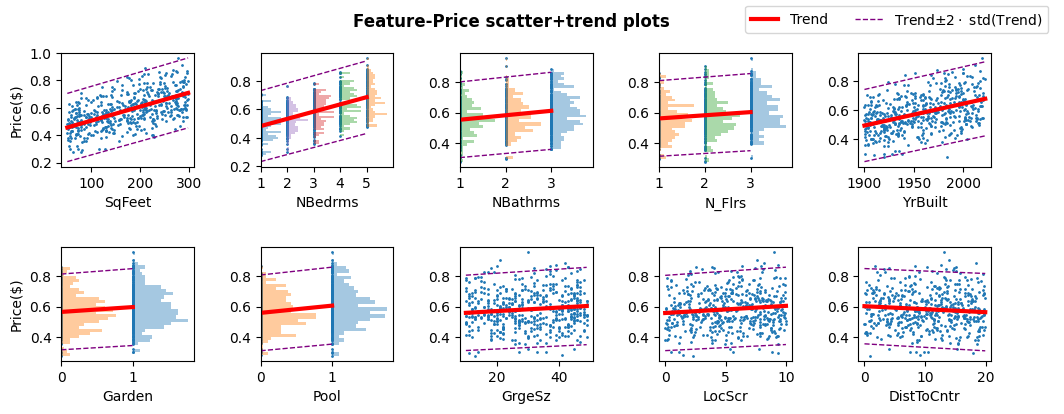

In [235]:
X = ds.iloc[:,:-1].values   #500x10 numpy array containing the features
y = ds.iloc[:,-1].values    #500x1 numpy array containing the responses
n_feat = len(X[0])
feat_names = ds.columns[:n_feat]

xgrid_df = np.ones_like(X)
i=0
for col_ in ds.columns[:-1]:
    xgrid_df[:,i] *= ds[col_].mean()
    i+=1
xgrid_df

ncols_ = 5
nrows_ = 2

plt.close()
fig,ax = plt.subplots(ncols=ncols_, nrows=nrows_, figsize=(12,4))
feat_i = 0
for ax_i, ax_j in [[i,j] for i in range(nrows_) for j in range(ncols_)]:
    ax[ax_i,ax_j].scatter(X[:,feat_i],
                       y,
                       s=1)
    if ax_j==0:
        ax[ax_i,ax_j].set_ylabel("Price($)")
    ax[ax_i,ax_j].set_yticks([i*1e6 for i in np.linspace(0.2,1,5)])
    ax[ax_i,ax_j].set_yticklabels([f"{i:0.1f}" for i in np.linspace(0.2,1,5)])
    feat_name = feat_names[feat_i]
    ax[ax_i,ax_j].set_xlabel(feat_name)

    if feat_name in ["NBedrms","NBathrms", "N_Flrs","Garden", "Pool"]:
        unique_vals = ds[feat_name].unique()
        for val in unique_vals:
            sub_price = ds[ds[feat_name]==val]["Price"]
            nbins_ = 30
            weights_ = np.ones_like(sub_price)/(1.3*max(np.histogram(sub_price, bins=nbins_)[0]))
            ax[ax_i,ax_j].hist(sub_price, 
                               orientation="horizontal",
                               bins=30,
                               weights=weights_,
                               bottom=val,
                               alpha=0.4)
        ax[ax_i,ax_j].set_xticks(np.arange(min(unique_vals)-1, max(unique_vals)+1))
    
    xgrid = xgrid_df.copy()
    n_points = 100
    xgrid[:n_points,feat_i] = np.linspace(min(X[:,feat_i]), max(X[:,feat_i]),n_points)
    ax[ax_i,ax_j].plot(xgrid[:n_points,feat_i], 
                       lr.predict(xgrid[:n_points,:]), 
                       color="red", lw=3)
    ax[ax_i,ax_j].plot(xgrid[:n_points,feat_i], 
                       lr.predict(xgrid[:n_points,:])+predict_std_curve(2,xgrid[:n_points,:],modelo.bse[0],modelo.bse[1:]), 
                       color="purple", lw=1, ls="--")
    ax[ax_i,ax_j].plot(xgrid[:n_points,feat_i], 
                       lr.predict(xgrid[:n_points,:])-predict_std_curve(2,xgrid[:n_points,:],modelo.bse[0],modelo.bse[1:]), 
                       color="purple", lw=1, ls="--")


    feat_i+=1
plt.plot([],[], color="red", lw=3, label="Trend")
plt.plot([],[], color="purple", lw=1, ls="--", label="Trend$\pm2\cdot$ std(Trend)")
fig.suptitle("Feature-Price scatter+trend plots", weight="bold")
fig.subplots_adjust(wspace=0.5, hspace=.7)
fig.legend(ncols=2, loc=(0.7,0.92))
plt.show()

As most of the samples rely between 2 stdandard deviations from the trend line (what should ideally  correspond to a 95%), linear regression seems to be again an extremely good choice.

## Residual plot

At the "Scatterplots and emerging trends" section we said that the assumption of a linear relation between price and the features would be proved using also residual plots. That what we'll do in this section, using, for example, the forward selection linear regressor trained before.

Text(0, 0.5, 'Residual')

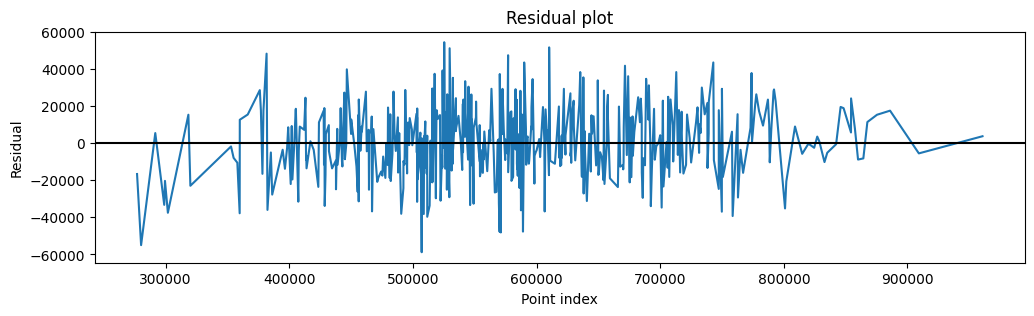

In [ ]:
plt.close()
plt.figure(figsize=(12,3))
plt.plot(ds.sort_values(by="Price").iloc[:,-1].values, (ds.sort_values(by="Price").iloc[:,-1].values-lr.predict(ds.sort_values(by="Price").iloc[:,:-1].values)))
plt.axhline(y=0, color="black")
plt.title("Residual plot")
plt.xlabel("Price")
plt.ylabel("Residual")

Besides outliers, the residual plot doesn't expose any kind of increasing/decreasing trend, then linear regression is a good choice.